##  Week4 복습과제

Week3에 대한 복습과제입니다.  
데이터셋(train.csv, mushrooms.csv)을 다운 받아주세요!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 'train.csv'으로 train_df를 생성하세요.

In [ ]:
train_df = pd.read_csv('./train.csv')

#### 데이터 보정을 위해 다음 코드를 실행시켜 주세요.

In [ ]:
# id 제외

train_df = train_df.drop("id", axis = 1)

#### LabelEncoder를 사용해 color, type column을 인코딩한 train_df를 만드시오.

In [ ]:
from sklearn.preprocessing import LabelEncoder

train_df['color'] = LabelEncoder().fit_transform(train_df['color'])
train_df['type'] = LabelEncoder().fit_transform(train_df['type'])

#### feature간의 상관관계를 확인하는 heatmap을 출력하시오.

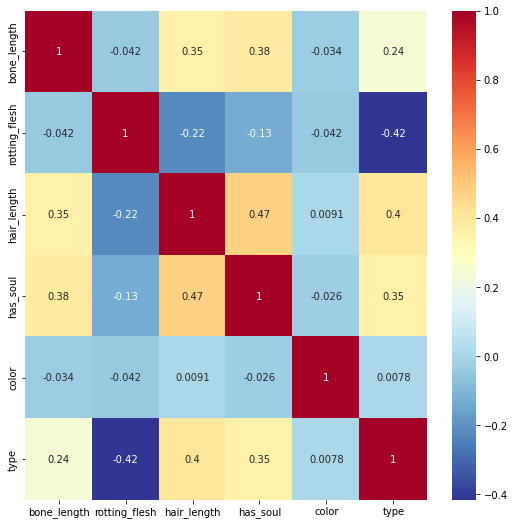

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu_r')

#### 독립변수(X)와 종속변수(y-type)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요.
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 5) (75, 5) (296,) (75,)


#### Gradient Boost를 활용하여 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (random_state=0,n_estimators=50,learning_rate=0.5)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=0,n_estimators=50,learning_rate=0.5)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도:{0:.6f}'.format(gb_accuracy))

GBM 정확도:0.706667


#### GBM 하이퍼 파라미터 튜닝을 한 후, 최적의 하이퍼 파라미터를 구하고 정확도를 출력하시오. 위의 값과 정확도를 비교하시오. 이때 n_estimators는 50,100,500, learning_rate는 0.005, 0.1, 0.5,1,10 을 변수로 넣으시오.(gridsearchCV이용,cv=2,verbose=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50,100,500],
    'learning_rate' : [0.05,0.1,0.5,1,10]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)
print('최적의 하이퍼 파라미터:\n',grid_cv.best_params_)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
최적의 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print('GBM정확도:{0:.6f}'.format(gb_accuracy))

GBM정확도:0.733333


정확도가 0.70 -> 0.73 으로 파라미터 최적화 후 상승함을 볼 수 있다

#### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (n_estimators=400, learning_rate = 0.1, max_depth = 3)

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            max_depth=3,
                            learning_rate=0.1)
xgb_wrapper.fit(X_train, y_train)
pred = xgb_wrapper.predict(X_test)

print(accuracy_score(y_test, pred))

0.68


#### 사이킷런 래퍼 클래스 LightGBM를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. 

n_estimators=400
조기 중단 파라미터: early_stopping_rounds=100, eval_metric="logloss",  eval_set=evals 

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier

evals = [(X_test, y_test)]

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals , verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's multi_logloss: 1.06078	valid_0's multi_logloss: 1.06078
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.01605	valid_0's multi_logloss: 1.01605
[3]	valid_0's multi_logloss: 0.98745	valid_0's multi_logloss: 0.98745
[4]	valid_0's multi_logloss: 0.961302	valid_0's multi_logloss: 0.961302
[5]	valid_0's multi_logloss: 0.935948	valid_0's multi_logloss: 0.935948
[6]	valid_0's multi_logloss: 0.905585	valid_0's multi_logloss: 0.905585
[7]	valid_0's multi_logloss: 0.881196	valid_0's multi_logloss: 0.881196
[8]	valid_0's multi_logloss: 0.860414	valid_0's multi_logloss: 0.860414
[9]	valid_0's multi_logloss: 0.839374	valid_0's multi_logloss: 0.839374
[10]	valid_0's multi_logloss: 0.825518	valid_0's multi_logloss: 0.825518
[11]	valid_0's multi_logloss: 0.813205	valid_0's multi_logloss: 0.813205
[12]	valid_0's multi_logloss: 0.807044	valid_0's multi_logloss: 0.807044
[13]	valid_0's multi_logloss: 0.80155	valid_0's multi_logloss: 0.80155
[14]	

In [ ]:
print(accuracy_score(y_test , preds))

0.6666666666666666


## Stacking 실습

CV set 기반 stacking을 통해 앙상블 모델을 만드려고 합니다.    
개별 모델이 교차검증을 통해 최종 모델이 사용할 학습용, 테스트용 데이터를 만드는 함수를 생성하시오.
```
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    return train_fold_pred , test_pred_mean
```

In [ ]:
from sklearn.model_selection import KFold

def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):

  kfold = KFold(n_splits=n_folds)
  train_fold_pred = np.zeros((X_train.shape[0], 1))
  test_pred_mean = np.zeros((X_test.shape[0], n_folds))

  for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train)):
    X_tr = X_train.iloc[train_idx]
    y_tr = y_train.iloc[train_idx]
    X_val = X_train.iloc[valid_idx]

    model.fit(X_tr, y_tr)
    train_fold_pred[valid_idx, :] = model.predict(X_val).reshape(-1, 1)
    test_pred_mean[:, fold] = model.predict(X_test)

  test_pred_mean = np.mean(test_pred_mean, axis=1).reshape(-1,1)
  
  return train_fold_pred, test_pred_mean

스태킹에 사용될 개별 모델을 생성하시오.

개별 모델:  KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, AdaBoost(n_estimators=100), LightGBM(n_estimators=400)

최종 모델: 로지스틱 회귀 (C=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
lgbm_clf = LGBMClassifier(n_estimators=400)
lr_final = LogisticRegression(C=10)

위에서 생성한 함수를 사용해 개별 모델을 학습, 예측시켜 메타모델에 사용될 학습용 데이터와 테스트용 데이터를 생성하고, 스태킹하시오.  
fold 수 = 6  
학습용 데이터 : stacked_X_train  
테스트용 데이터 : stacked_X_test

In [ ]:
knn_train, knn_test = get_stacking_dataset(knn_clf, X_train, y_train, X_test, n_folds= 6)
rf_train, rf_test = get_stacking_dataset(rf_clf, X_train, y_train, X_test, 6)
dt_train, dt_test = get_stacking_dataset(dt_clf, X_train, y_train, X_test,  6)    
ab_train, ab_test = get_stacking_dataset(ada_clf, X_train, y_train, X_test, 6)
lgbm_train, lgbm_test = get_stacking_dataset(lgbm_clf, X_train, y_train, X_test, 6)

In [ ]:
stacked_X_train = np.concatenate((knn_train, rf_train, dt_train, ab_train, lgbm_train), axis=1)
stacked_X_test = np.concatenate((knn_test, rf_test, dt_test, ab_test, lgbm_test), axis=1)

최종 모델 (logistic regression)을 학습시키고, 정확도를 구하시오.

In [ ]:
lr_final.fit(stacked_X_train, y_train)
pred_final = lr_final.predict(stacked_X_test)
print(accuracy_score(y_test, pred_final))

0.6266666666666667


### CatBoost

범주형 변수가 많은 데이터에 catboost를 적용해봅시다.

데이터 출처:
https://www.kaggle.com/datasets/uciml/mushroom-classification


In [ ]:
# mushrooms.csv 파일을 사용합니다.

mushroom_df = pd.read_csv('./mushrooms.csv')

mushroom_df feature들의 data type을 확인하시오.

In [ ]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

feature와 target을 각각 X_mushroom, y_mushroom으로 분리하고,  
train_test_split 함수로 train, test set을 분리하시오. (test size = 0.2)

In [ ]:
X_mushroom = mushroom_df.iloc[:, 1:]
y_mushroom = mushroom_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, test_size=0.2)

CatBoostClassifier를 불러오고, Pool 함수를 이용해 범주형 변수를 처리하도록 train_pool, test_pool을 만드시오.

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
train_pool = Pool(X_train, y_train, cat_features=list(X_train.columns))
test_pool = Pool(X_test, y_test, cat_features=list(X_test.columns))

iteration=400, learning_rate=0.1, max_depth=3로 설정한 CatBoost 모델로 버섯에 대한 정보를 학습하고 테스트 데이터 버섯의 독성 여부를 예측하시오. 또 정확도를 구하시오.  

In [ ]:
cb_clf = CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
cb_clf.fit(train_pool)
pred = cb_clf.predict(test_pool)

print(accuracy_score(y_test, pred))

0:	learn: 0.4802979	total: 88.4ms	remaining: 35.3s
1:	learn: 0.3431877	total: 120ms	remaining: 23.8s
2:	learn: 0.2408795	total: 161ms	remaining: 21.3s
3:	learn: 0.1840713	total: 176ms	remaining: 17.4s
4:	learn: 0.1361660	total: 192ms	remaining: 15.1s
5:	learn: 0.0978871	total: 252ms	remaining: 16.6s
6:	learn: 0.0792814	total: 263ms	remaining: 14.8s
7:	learn: 0.0553708	total: 278ms	remaining: 13.6s
8:	learn: 0.0451319	total: 296ms	remaining: 12.8s
9:	learn: 0.0393696	total: 310ms	remaining: 12.1s
10:	learn: 0.0341192	total: 322ms	remaining: 11.4s
11:	learn: 0.0328744	total: 333ms	remaining: 10.8s
12:	learn: 0.0278379	total: 345ms	remaining: 10.3s
13:	learn: 0.0261642	total: 366ms	remaining: 10.1s
14:	learn: 0.0243536	total: 393ms	remaining: 10.1s
15:	learn: 0.0230134	total: 418ms	remaining: 10s
16:	learn: 0.0208316	total: 433ms	remaining: 9.76s
17:	learn: 0.0196610	total: 448ms	remaining: 9.5s
18:	learn: 0.0186410	total: 468ms	remaining: 9.39s
19:	learn: 0.0170112	total: 500ms	remaining

수고하셨습니다!